In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from mpl_toolkits import mplot3d

## Paramètres de jeu de données

In [2]:
param_y_normal_data = 1
param_y_abnormal_data = 0
contamination = 1/100 # 1%
file_name = "synthetic_3D_data_V2_"+str(datetime.now())
#full_file_path = str(datetime.now().date())+"/"+file_name+".csv"
full_file_path = file_name+".csv"

## Normal dataset generation

In [3]:
#Normal “continuous uniform” distribution dataset https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.random_sample.html
mu = 0 #mean
sigma = 1 #Standard deviation
size = 1500 #number of samples
y_n_dataset  = []
x1_n_dataset = []
x2_n_dataset = []
x3_n_dataset = []
i = 0
rayon = 10 #C'était 7
while i<size:
    #longitude entre 0 et 2pi
    longitude = (2*np.pi-0) * np.random.random_sample() + 0
    #latitude entre -pi/2 et pi/2
    latitude = (np.pi/2 --np.pi/2) * np.random.random_sample() + -np.pi/2
    
    x1 = rayon * np.cos(latitude) * np.cos(longitude)
    x1_n_dataset.append(x1)
    x2 = rayon * np.cos(latitude) * np.sin(longitude)
    x2_n_dataset.append(x2)
    x3 = rayon * np.sin(latitude)
    x3_n_dataset.append(x3)
    y_n_dataset.append(param_y_normal_data)
    i = i + 1
n_data_array = {'0': x1_n_dataset, '1':x2_n_dataset, '2':x3_n_dataset, 'is_normal': y_n_dataset}
n_dataset = pd.DataFrame(n_data_array, columns=['0', '1', '2', 'is_normal'])
#n_dataset

In [4]:
# Vérification
i = 100
distance = np.sqrt(x1_n_dataset[i]**2 + x2_n_dataset[i]**2 + x3_n_dataset[i]**2)
distance

10.0

#### A supprimer plus tard
#Normal “continuous uniform” distribution dataset https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.random_sample.html
mu = 0 #mean
sigma = 1 #Standard deviation
size = 1500 #number of samples
y_n_dataset  = []
x1_n_dataset = []
x2_n_dataset = []
x3_n_dataset = []
i = 0
while i<size:
    found = False
    while not found:
        x1 = (10--10) * np.random.random_sample() + -10
        x2 = (7--7) * np.random.random_sample() + -7
        x3 = (7--7) * np.random.random_sample() + -7
        distance = np.sqrt(x1**2 + x2**2 + x3**2)
        if distance == 7:
            found = True
    x1_n_dataset.append(x1)
    x2_n_dataset.append(x2)
    x3_n_dataset.append(x3)
    y_n_dataset.append(param_y_normal_data)
    i = i + 1
n_data_array = {'0': x1_n_dataset, '1':x2_n_dataset, '2':x3_n_dataset, 'is_normal': y_n_dataset}
n_dataset = pd.DataFrame(n_data_array, columns=['0', '1', '2', 'is_normal'])
n_dataset

## Abnormal gaussian dataset generation

In [5]:
#Abnormal gaussian dataset
mu_a = 0 #mean
sigma_a = 0.5 #Standard deviation
size_a = int(size*contamination) #size of samples
y_a_dataset  = []
x1_a_dataset = []
x2_a_dataset = []
x3_a_dataset = []
i = 0
while i<size_a:
    y_a_dataset.append(param_y_abnormal_data)
    i = i + 1
x1_a_dataset = np.random.normal(mu_a, sigma_a, size_a)
x2_a_dataset = np.random.normal(mu_a, sigma_a, size_a)
x3_a_dataset = np.random.normal(mu_a, sigma_a, size_a)
a_data_array = {'0': x1_a_dataset, '1':x2_a_dataset, '2':x3_a_dataset, 'is_normal': y_a_dataset}
a_dataset = pd.DataFrame(a_data_array, columns=['0', '1', '2', 'is_normal'])
#a_dataset

In [6]:
# Vérification
j = 2
distance = np.sqrt(x1_a_dataset[j]**2 + x2_a_dataset[j]**2 + x3_a_dataset[j]**2)
distance

0.8098858682522824

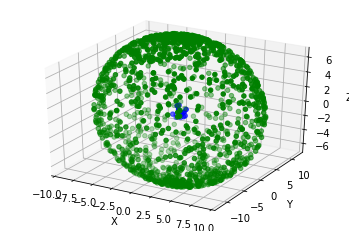

In [11]:
%matplotlib inline
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim(-10.,10.)
ax.set_ylim(-13.,13.)
ax.set_zlim(-7.,7.)

ax.scatter3D(n_dataset['0'], n_dataset['1'], n_dataset['2'], c="g");
ax.scatter3D(0, 0, 0, c="r");
ax.scatter3D(a_dataset['0'], a_dataset['1'], a_dataset['2'], c="b");


## Génération du jeu de données complet

In [8]:
dataset = pd.concat([n_dataset, a_dataset], ignore_index=True, sort=False)
dataset

,0,1,2,is_normal
0,8.103486,-4.132109,-4.154417,1
1,1.829295,9.508433,-2.498677,1
2,0.824319,-8.567915,5.090317,1
3,6.596176,-0.058208,-7.515788,1
4,-2.473570,-5.387595,8.053277,1
5,-9.163037,-0.093664,-4.003745,1
6,-0.350629,-0.105482,-9.993294,1
7,-3.403759,6.954644,-6.328298,1
8,-0.220344,-0.259773,-9.994197,1
9,-6.224490,5.816094,-5.237249,1


In [9]:
dataset.describe()

,0,1,2,is_normal
count,1515.000000,1515.000000,1515.000000,1515.000000
mean,-0.031790,-0.165822,0.170529,0.990099
std,4.950867,4.935204,7.082208,0.099043
min,-9.973872,-9.970715,-9.999943,0.000000
25%,-3.456428,-3.591224,-7.016471,1.000000
50%,0.005909,-0.085097,0.418493,1.000000
75%,3.376583,3.327439,7.149248,1.000000
max,9.977974,9.992620,9.999999,1.000000


## Créé le fichier .csv du jeu de données

In [10]:
dataset.to_csv(full_file_path, index=None, header=True)